In [12]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị đẹp hơn
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [13]:
# 2. LOAD DATA
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")
print("Shape:", df.shape)
df.head()

Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# 3. DATA DICTIONARY (tự động sinh)
data_dict = pd.DataFrame({
    "Column": df.columns,
    "DataType": df.dtypes.astype(str),
    "UniqueValues": [df[col].nunique() for col in df.columns],
    "MissingValues": df.isnull().sum().values
})

display(data_dict)  # hiện bảng trong notebook
data_dict.to_csv("data_dictionary.csv", index=False) 

,Column,DataType,UniqueValues,MissingValues
Row ID,Row ID,int64,9994,0
Order ID,Order ID,object,5009,0
Order Date,Order Date,object,1237,0
Ship Date,Ship Date,object,1334,0
Ship Mode,Ship Mode,object,4,0
Customer ID,Customer ID,object,793,0
Customer Name,Customer Name,object,793,0
Segment,Segment,object,3,0
Country,Country,object,1,0
City,City,object,531,0


In [15]:
# 4. DATA CLEANING
# chuẩn hóa tên cột
df.columns = df.columns.str.strip().str.lower()

# chuyển đổi cột ngày
for col in ["order date", "ship date"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# tạo biến mới
if "order date" in df.columns:
    df["year"] = df["order date"].dt.year
    df["month"] = df["order date"].dt.month

In [16]:
# 5. SUMMARY STATISTICS
print(df.describe(include="all").transpose())

                count unique              top  freq  \
row id         9994.0    NaN              NaN   NaN   
order id         9994   5009   CA-2017-100111    14   
order date       9994    NaN              NaN   NaN   
ship date        9994    NaN              NaN   NaN   
ship mode        9994      4   Standard Class  5968   
customer id      9994    793         WB-21850    37   
customer name    9994    793    William Brown    37   
segment          9994      3         Consumer  5191   
country          9994      1    United States  9994   
city             9994    531    New York City   915   
state            9994     49       California  2001   
postal code    9994.0    NaN              NaN   NaN   
region           9994      4             West  3203   
product id       9994   1862  OFF-PA-10001970    19   
category         9994      3  Office Supplies  6026   
sub-category     9994     17          Binders  1523   
product name     9994   1850  Staple envelope    48   
sales     

In [17]:
# 6. DISTRIBUTION PLOTS (tự động)
import os

def plot_distributions(df, max_unique_cats=20, save_path=None):
    if save_path and not os.path.exists(save_path):
        os.makedirs(save_path)   # tạo thư mục nếu chưa tồn tại

    for col in df.columns:
        plt.figure(figsize=(8,4))
        
        # Numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=True, bins=30)
            plt.title(f"Distribution of {col}")
        
        # Categorical
        else:
            n_unique = df[col].nunique()
            if n_unique <= max_unique_cats:
                order = df[col].value_counts().index
                sns.countplot(data=df, x=col, order=order)
                plt.title(f"Countplot of {col}")
                plt.xticks(rotation=45, ha="right")
            else:
                plt.close()
                continue  # bỏ qua cột có quá nhiều unique
        
        plt.tight_layout()
        if save_path:
            plt.savefig(f"{save_path}/{col}.png")  # lưu vào thư mục
        plt.show()


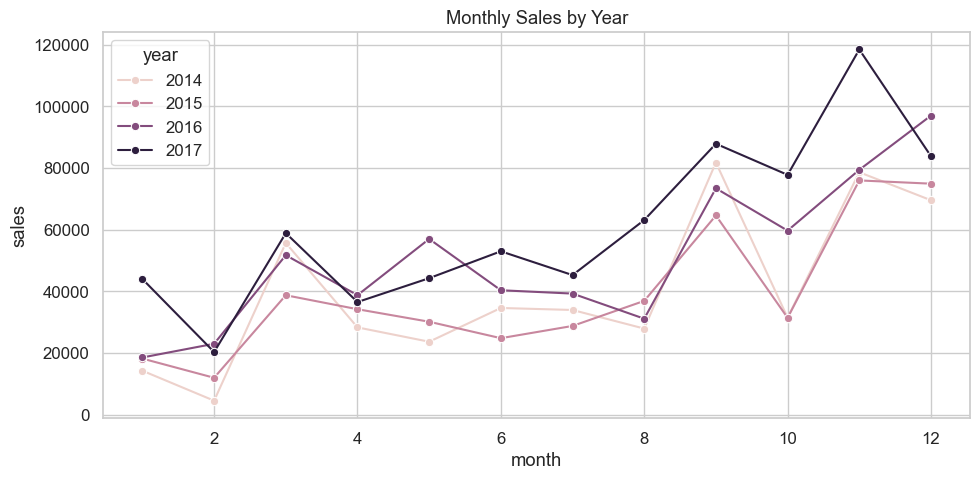

C:\Users\Admin\AppData\Local\Temp\ipykernel_14008\192310113.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


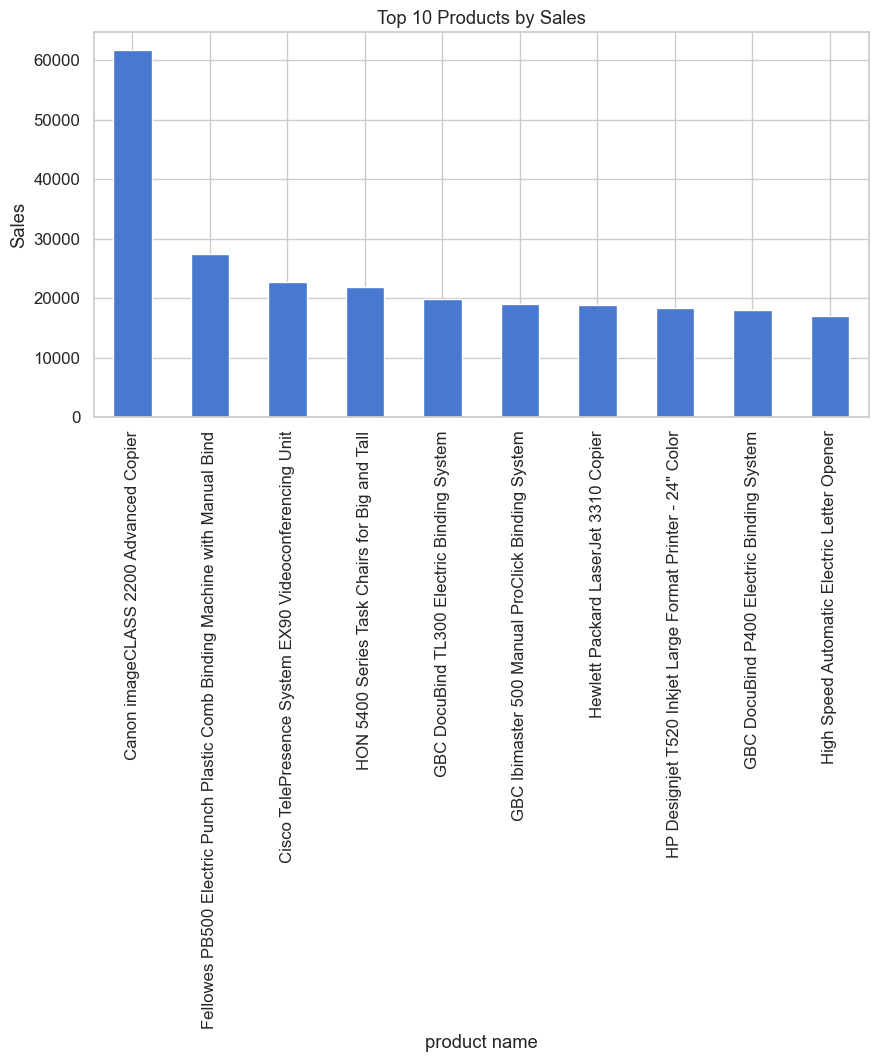

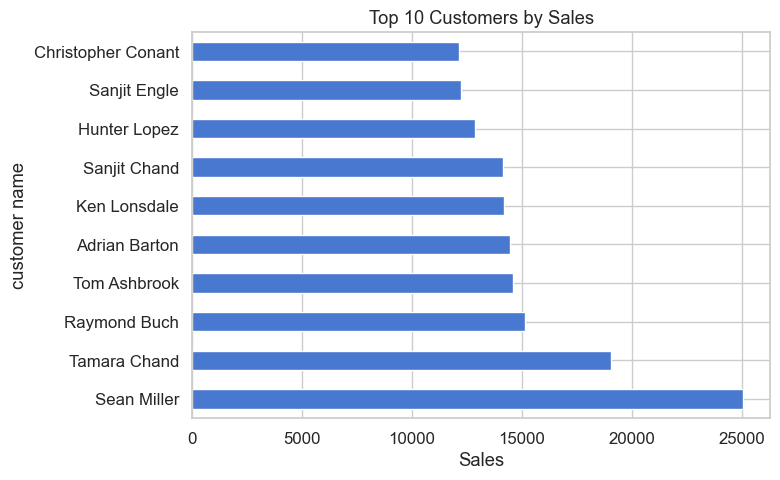

In [21]:
# 7. BUSINESS QUESTIONS / INSIGHTS

# Doanh thu theo tháng
if "sales" in df.columns:
    monthly_sales = df.groupby(["year","month"])["sales"].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=monthly_sales, x="month", y="sales", hue="year", marker="o")
    plt.title("Monthly Sales by Year")
    plt.tight_layout()
    plt.savefig("images/monthly_sales.png", bbox_inches="tight")  # Lưu đúng tên
    plt.show()

# Top 10 sản phẩm
if "product name" in df.columns:
    top_products = df.groupby("product name")["sales"].sum().nlargest(10)
    plt.figure(figsize=(10,5))
    ax = top_products.plot(kind="bar", title="Top 10 Products by Sales")
    plt.ylabel("Sales")
    plt.tight_layout()
    plt.savefig("images/top_products.png", bbox_inches="tight")  # Lưu đúng tên
    plt.show()

# Top 10 khách hàng
if "customer name" in df.columns:
    top_customers = df.groupby("customer name")["sales"].sum().nlargest(10)
    plt.figure(figsize=(8,5))
    ax = top_customers.plot(kind="barh", title="Top 10 Customers by Sales")
    plt.xlabel("Sales")
    plt.tight_layout()
    plt.savefig("images/top_customers.png", bbox_inches="tight")  # Lưu đúng tên
    plt.show()

## Chart Analysis and Conclusions

### 1. Monthly Sales by Year  
The line plot shows the trend of sales across different months for each year.  
We can observe **seasonal patterns**, with certain months consistently achieving higher sales.  
➡️ This insight can help in planning **marketing campaigns** and **inventory management**.

### 2. Top 10 Products by Sales  
The bar chart highlights the products that contribute the most to total sales.  
➡️ Focusing on these top-performing products can help **maximize revenue** and **optimize stock levels**.

### 3. Top 10 Customers by Sales  
The horizontal bar chart identifies the most valuable customers.  
➡️ Building strong relationships and offering **personalized promotions** to these customers can **increase loyalty** and **future sales**.

---

### 📌 Conclusion  
The analysis reveals:  
- **Key sales trends**  
- **Best-selling products**  
- **Top customers**  

These insights can guide business strategy, such as **targeted marketing, inventory planning, and customer relationship management** to drive further growth.